In [4]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

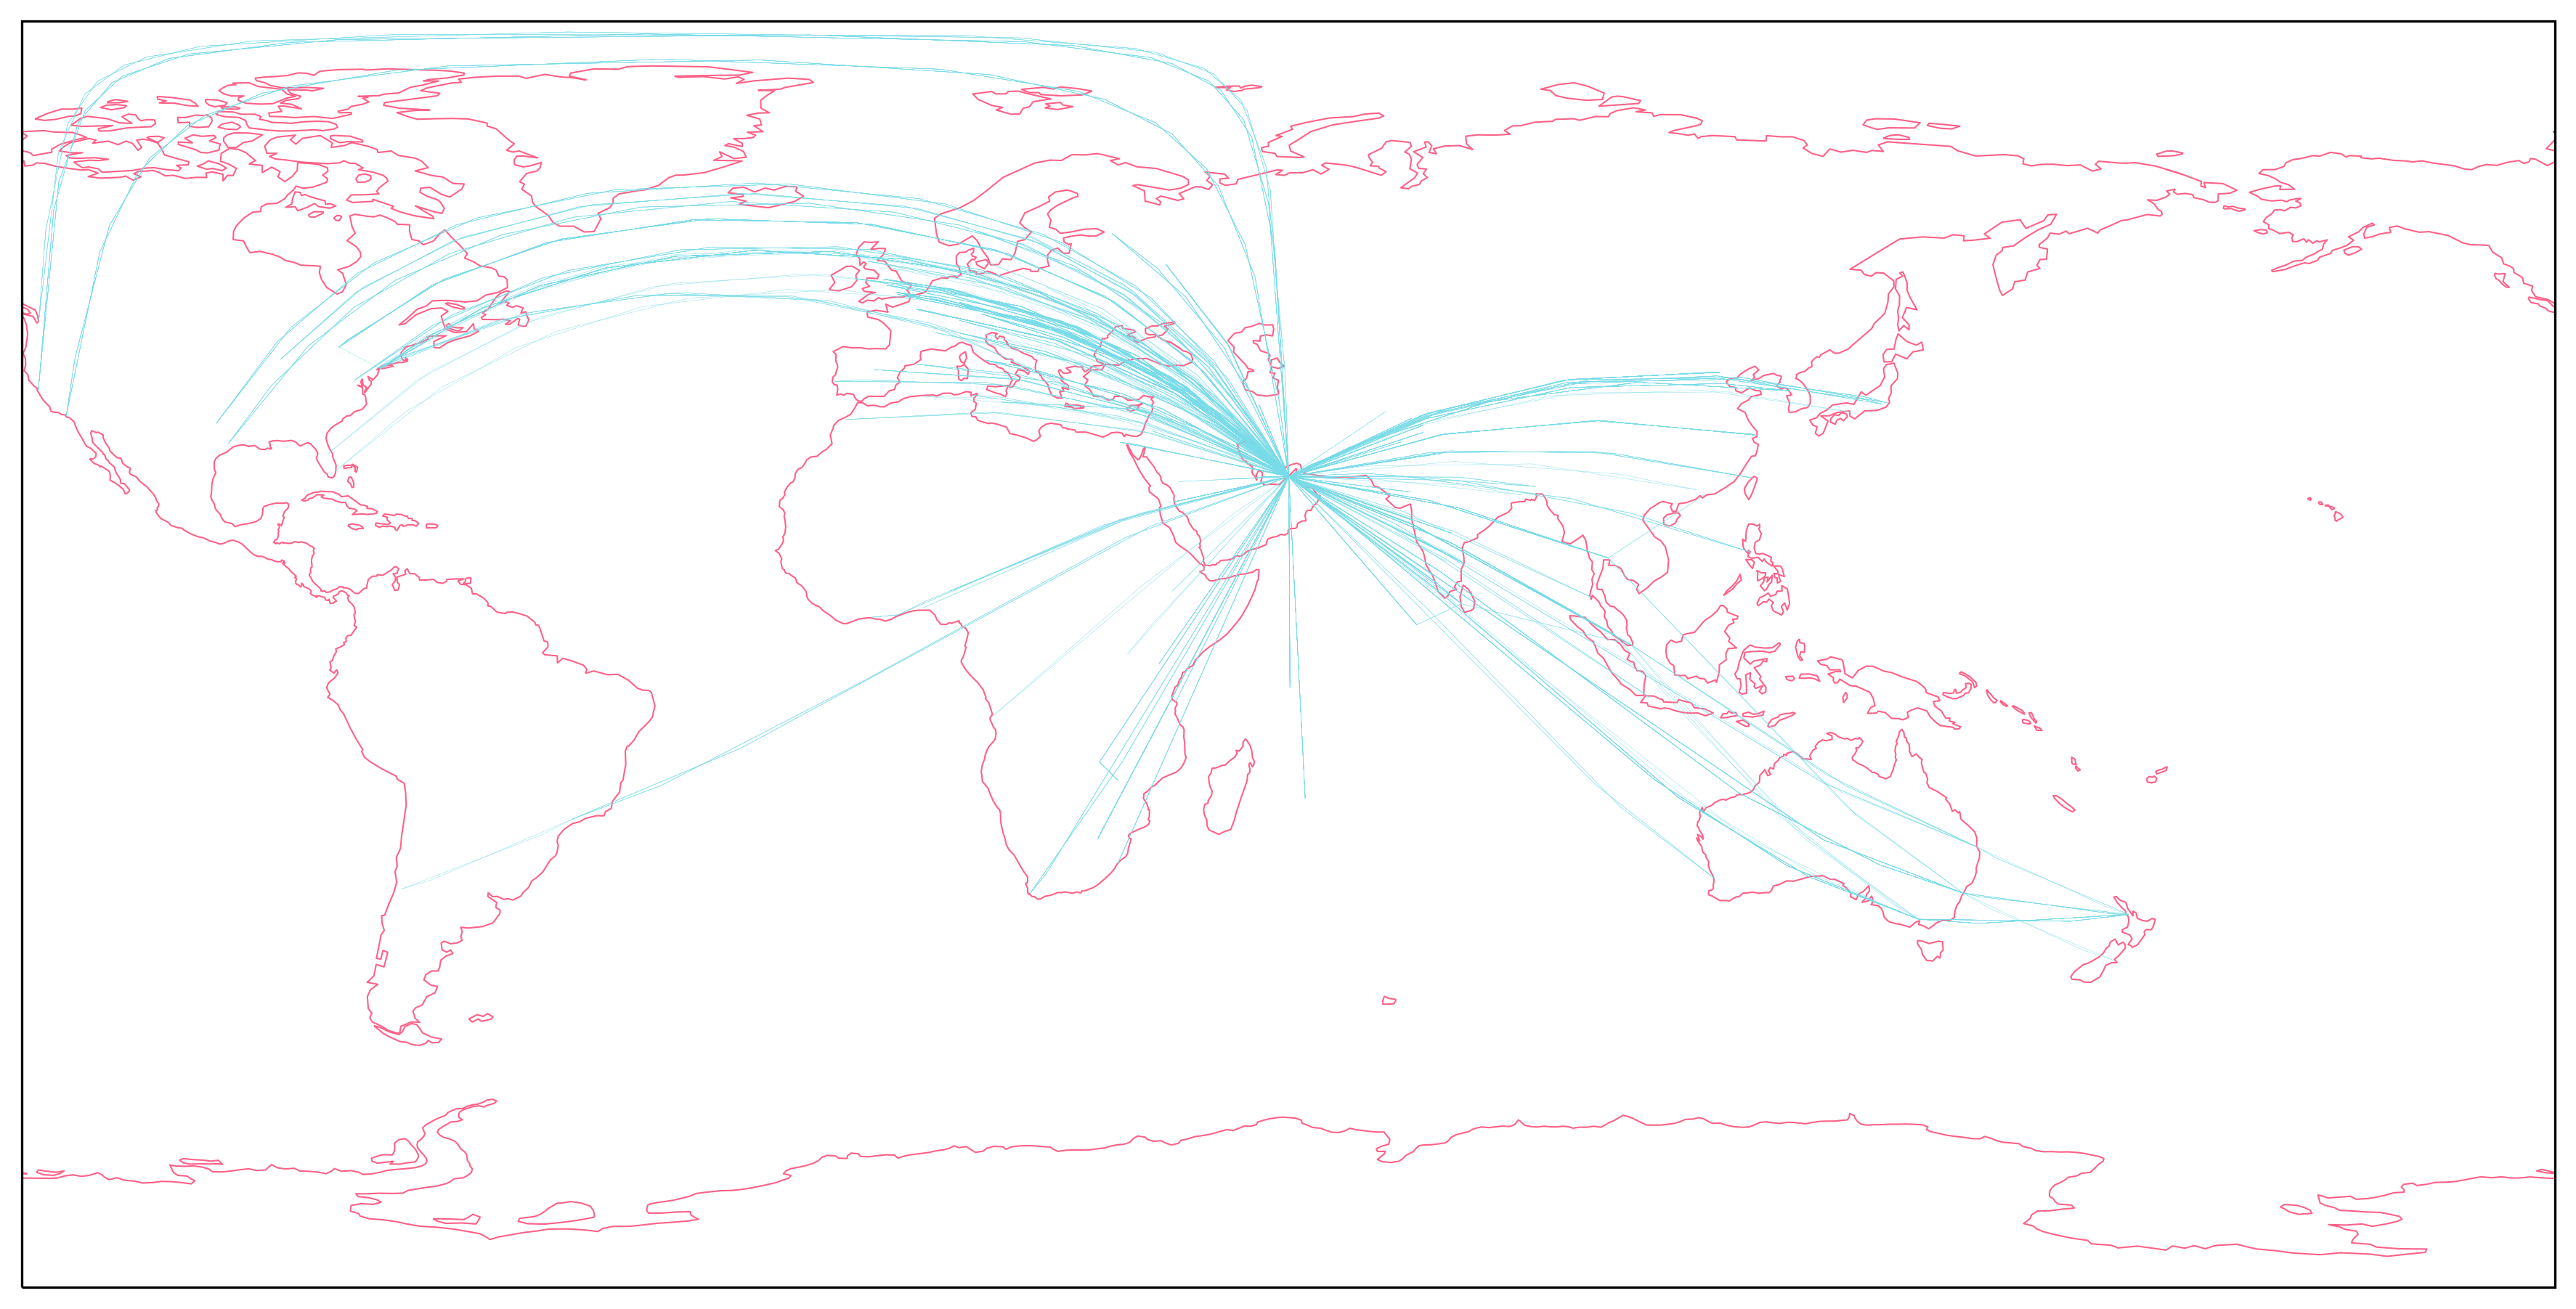

<Figure size 432x288 with 0 Axes>

In [46]:
def main(in_file_name):

    fig = plt.figure(figsize = (15.0, 15.0), dpi = 300)
    
    # add_subplot(nrows, ncols, index, **kwargs)
    # central_longitude "55.2708" is DXB longitude, centering the map on Dubai
    ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude=55.2708))
    
    # background image
    #ax.add_image(color = 'black')
    
    # make the map global
    ax.set_global()
    
    # set coastlines color to "FAUX-STRAWBERRY"
    ax.coastlines(color = '#ff6188', linewidth= 0.5)
                 
    # define the expected CSV columns to be use
    csv_cols = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'flight_nb')

    # read the csv
    # set the data
    routes = pd.read_csv(in_file_name, names = csv_cols, na_values = ['\\N'], sep = ',', skiprows = 1)
    
    # put the lons and lats separated
    dep_lon, dep_lat = routes['dep_lon'], routes['dep_lat']
    arr_lon, arr_lat = routes['arr_lon'], routes ['arr_lat']
    
    # need to rewrap column in Series to apply key function
    #ax.plot, transform=ccrs.PlateCarree())
    #ax.plot(routes['dep_lat'],routes['dep_lon'], color = '#78dce8', transform=ccrs.Geodetic())
    #ax.plot(routes['arr_lat'], routes['arr_lon'], color = '#78dce8', transform=ccrs.Geodetic())
    
    # new one
    # defines the data and the color of the line "FAUX-SKY BLUE"
    # "Geodetic()" set the lines in the spherical shape of the world
    ax.plot([dep_lon, arr_lon], [dep_lat, arr_lat], color = '#78dce8',linewidth= 0.1, transform=ccrs.Geodetic())
    
    # display the map
    plt.show()
    
    # save output image of map
    #plt.savefig('output.svg', dpi=300, facecolor='black')
                  
# to print the map
if __name__ == '__main__':
    main('flight_map.csv')